In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from pandas.api.types import is_string_dtype
from sklearn.ensemble import RandomForestRegressor
sns.set()

In [2]:
df = pd.read_csv('data/responses.csv')
df = df.fillna(-1.0)
df.shape

(1010, 150)

In [3]:
def map_data_to_numeric_values(df):
    replace_dict = {}
    for col in df.columns:
        if is_string_dtype(df[col]):
            unique_values = df[col].unique()
            replace_dict[col] = dict(zip(unique_values, range(len(unique_values))))
    return df.replace(replace_dict)

df = map_data_to_numeric_values(df)
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,0,0,0,0,0,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,0,0,0,0,1,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,0,0,1,0,1,0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,0,0,0,1,1,1
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,0,0,1,0,0,1


<AxesSubplot:>

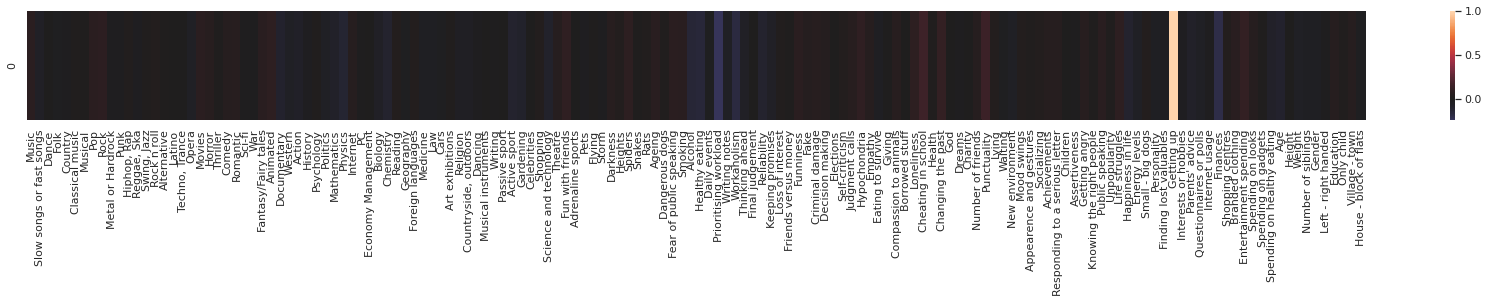

In [10]:
fig, ax = plt.subplots(figsize=(30,2))
corr = np.array(df.corrwith(df['Getting up'])).reshape((1, -1))
sns.heatmap(corr, xticklabels=list(df.columns), center=0, ax=ax)

In [5]:
getting_up_col = 128

In [6]:
target = 'Getting up'
features = np.concatenate([df.columns[:getting_up_col], df.columns[getting_up_col+1:]])

In [7]:
X_train, y_train = df[features], df[target]
# X_test, y_test = df[preferences_cols], df[target]

rf = RandomForestRegressor(
    random_state=0,
    n_estimators = 50,
    max_depth = 2,
)

rf.fit(
    X_train,
    y_train,
)

RandomForestRegressor(max_depth=2, n_estimators=50, random_state=0)

In [8]:
feature_inds = np.argsort(-rf.feature_importances_)
for feature, importance in zip(features[feature_inds][:6], rf.feature_importances_[feature_inds][:20]):
    print(f'Feature: {feature}, importance: {importance:.3f}')

Feature: Prioritising workload, importance: 0.252
Feature: Punctuality, importance: 0.240
Feature: Finances, importance: 0.123
Feature: Alcohol, importance: 0.046
Feature: Workaholism, importance: 0.041
Feature: Healthy eating, importance: 0.024
